In [15]:
# use k-means + extract_patches_2d extract features
# how to use the extracted features?
print(__doc__)
%matplotlib inline

import numpy as np
import glob
import re
from scipy import ndimage
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt


Automatically created module for IPython interactive environment


In [16]:
# get images
train_images_path = "./data/train_images/*.tif"
test_images_path = "./data/test_images/*.tif"
def get_pic(pic_path):
    
    pic_paths = []
    for pic in glob.glob(pic_path):
        pic_paths.append(pic)
        
    def sort_path(path1, path2):
        pattern = re.compile(r"\d+")
        num1 = int(pattern.search(path1).group())
        num2 = int(pattern.search(path2).group())
        return cmp(num1, num2)
    
    pic_paths.sort(sort_path)
    
    pics = []
    for pic in pic_paths:
        temp = ndimage.imread(pic,mode='L')
        pics.append(temp)
    pics = np.array(pics)
    return pics

train_images = get_pic(train_images_path)
test_images = get_pic(test_images_path)

print(train_images[0].shape)

(101, 101)


In [17]:
rng = np.random.RandomState(0)
size = 4

kmeans = MiniBatchKMeans(n_clusters=size*size, random_state=rng, verbose=True)

patch_size = (20, 20)
pic_shape = train_images[0].shape

buffer = []
index = 0
for _ in range(6):
    for img in train_images:
        data = extract_patches_2d(img, patch_size, max_patches=50, random_state=rng)
        data = np.reshape(data, (len(data), -1))
        buffer.append(data)
        index += 1
        if index % 10 == 0:
            data = np.concatenate(buffer, axis=0)
            data = np.subtract(data, np.mean(data, axis=0))
            data = np.divide(data, np.std(data, axis=0))
            kmeans.partial_fit(data)
            buffer = []
        if index % 100 == 0:
            print('Partial fit of %4i out of %i'
                  % (index, 6 * len(train_images)))


Partial fit of  100 out of 1200
Partial fit of  200 out of 1200
Partial fit of  300 out of 1200
Partial fit of  400 out of 1200
Partial fit of  500 out of 1200
Partial fit of  600 out of 1200
Partial fit of  700 out of 1200
Partial fit of  800 out of 1200
Partial fit of  900 out of 1200
Partial fit of 1000 out of 1200
Partial fit of 1100 out of 1200
Partial fit of 1200 out of 1200


(16, 400)


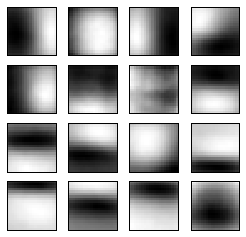

In [18]:
plt.figure(figsize=(4.2, 4))
print(kmeans.cluster_centers_.shape)
for i, patch in enumerate(kmeans.cluster_centers_):
    plt.subplot(size, size, i + 1)
#     print(len(patch))
#     print(patch_size)
#     print(patch.reshape(patch_size))
    plt.imshow(patch.reshape(patch_size), cmap=plt.cm.gray,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())

plt.show()